## Import Libraries

In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

#1 Membaca data

In [154]:
# import data
df = pd.read_excel('titanic.xlsx')
df.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [155]:
df.tail()

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [156]:
df.sample(5)

,survived,name,sex,age
268,0,"Smith, Mr. Lucien Philip",male,24.0
354,1,"Bryhl, Miss. Dagmar Jenny Ingeborg",female,20.0
399,1,"Drew, Master. Marshall Brines",male,8.0
453,1,"Hold, Mrs. Stephen (Annie Margaret Hill)",female,29.0
31,1,"Blank, Mr. Henry",male,40.0


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


Observation:

1. Data berisi 4 kolom dan 500 baris
2. Terdapat data kosong pada kolom "age"
3. Jenis tipe data sesuai dengan namanya


#2 Statistical Summary

In [158]:
df.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [159]:
categoricals = ['name', 'sex']
numericals = ['survived', 'age']

In [160]:
df[categoricals].describe()

,name,sex
count,500,500
unique,499,2
top,"Eustis, Miss. Elizabeth Mussey",male
freq,2,288


Observation:

1. "name" memiliki data yang sama
2. "sex" memiliki pilihan perempuan dan laki-laki, dengan 288 laki-laki sisanya perempuan

In [161]:
df[numericals].describe()

,survived,age
count,500.000000,451.000000
mean,0.540000,35.917775
std,0.498897,14.766454
min,0.000000,0.666700
25%,0.000000,24.000000
50%,1.000000,35.000000
75%,1.000000,47.000000
max,1.000000,80.000000


Observation:

1. "age" menunjukkan distribusi simetris berdasarkan nilai rata-rata dan median
2. "survived" adalah kolom biner karena nilainya 0 atau 1

In [162]:
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of name column
name
Eustis, Miss. Elizabeth Mussey                                                        2
Becker, Miss. Ruth Elizabeth                                                          1
Becker, Miss. Marion Louise                                                           1
Becker, Master. Richard F                                                             1
Beauchamp, Mr. Henry James                                                            1
Beane, Mrs. Edward (Ethel Clarke)                                                     1
Beane, Mr. Edward                                                                     1
Bateman, Rev. Robert James                                                            1
Banfield, Mr. Frederick James                                                         1
Ball, Mrs. (Ada E Hall)                                                               1
Baimbrigge, Mr. Charles Robert                                                        1

In [163]:
for col in numericals:
  print(f"==== {col} ====")
  print(df[col].value_counts(), '\n')

==== survived ====
survived
1    270
0    230
Name: count, dtype: int64 

==== age ====
age
24.0000    23
30.0000    20
36.0000    19
18.0000    14
42.0000    14
45.0000    14
35.0000    14
22.0000    12
28.0000    12
23.0000    11
21.0000    11
31.0000    11
48.0000    11
25.0000    11
29.0000    10
54.0000    10
50.0000    10
34.0000    10
47.0000    10
39.0000     9
27.0000     9
33.0000     8
49.0000     8
38.0000     8
19.0000     8
40.0000     8
55.0000     8
32.0000     7
60.0000     7
17.0000     7
26.0000     7
44.0000     6
52.0000     6
37.0000     6
58.0000     6
64.0000     5
46.0000     5
57.0000     5
51.0000     5
16.0000     4
53.0000     4
56.0000     4
43.0000     4
62.0000     4
61.0000     4
1.0000      3
8.0000      3
63.0000     3
41.0000     3
15.0000     2
71.0000     2
20.0000     2
65.0000     2
4.0000      2
6.0000      2
2.0000      1
0.9167      1
14.0000     1
11.0000     1
76.0000     1
59.0000     1
80.0000     1
28.5000     1
32.5000     1
70.0000     

#3 Cek data duplikat


In [164]:
len(df)

500

In [165]:
len(df.drop_duplicates())

499

In [166]:
len(df.drop_duplicates()) / len(df)

0.998

In [167]:
list(df.columns)

['survived', 'name', 'sex', 'age']

In [168]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,survived,name,sex,age
104,1,"Eustis, Miss. Elizabeth Mussey",female,54.0
349,1,"Eustis, Miss. Elizabeth Mussey",female,54.0


In [169]:
duplicates.groupby(list(df.columns)).size()

,,,,0
survived,name,sex,age,
1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [170]:
duplicates.groupby(list(df.columns)).size().reset_index(name='jumlah duplikat')

,survived,name,sex,age,jumlah duplikat
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [171]:
# Langkah 2: Hitung frekuensi kemunculan tiap baris duplikat
duplicate_counts = duplicates.groupby(list(df.columns)).size().reset_index(name='jumlah_duplikat')

# Langkah 3: Urutkan berdasarkan jumlah duplikat
sorted_duplicates = duplicate_counts.sort_values(by='jumlah_duplikat', ascending=False)

# Tampilkan hasil
print("Baris duplikat yang sudah diurutkan berdasarkan jumlah kemunculannya:")
sorted_duplicates

Baris duplikat yang sudah diurutkan berdasarkan jumlah kemunculannya:


,survived,name,sex,age,jumlah_duplikat
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [172]:
df = df.drop_duplicates()

In [173]:
len(df.drop_duplicates()) / len(df)

1.0

#4 Cek missing value

In [174]:
df.isna().sum()

,0
survived,0
name,0
sex,0
age,49


In [175]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= survived =================


,count
survived,
1,269
0,230



============= name =================


,count
name,
"McCrae, Mr. Arthur Gordon",1
"Allen, Miss. Elisabeth Walton",1
"Allison, Master. Hudson Trevor",1
"Lehmann, Miss. Bertha",1
"Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)",1
"Laroche, Mr. Joseph Philippe Lemercier",1
"Laroche, Miss. Simonne Marie Anne Andree",1
"Laroche, Miss. Louise",1
"Lamb, Mr. John Joseph",1



============= sex =================


,count
sex,
male,288
female,211



============= age =================


,count
age,
24.0000,23
30.0000,20
36.0000,19
18.0000,14
42.0000,14
45.0000,14
35.0000,14
22.0000,12
28.0000,12


In [176]:
total_rows = len(df)
total_rows

499

In [177]:
df.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [178]:
# percentage version
total_rows = len(df)

# Menghitung dan menampilkan persentase missing values di setiap kolom satu per satu
for column in df.columns:
    missing_count = df[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'survived' Has 0 missing values (0.00%)
Column 'name' Has 0 missing values (0.00%)
Column 'sex' Has 0 missing values (0.00%)
Column 'age' Has 49 missing values (9.82%)


In [179]:
# Handling missing value for EDA, without splitting
for column in df.columns:
    if df[column].dtype == 'object':
        # Jika kolom bertipe object, isi dengan mode
        df[column].fillna(df[column].mode()[0], inplace=True)
    else: # karena tipe data hanya object dan numerik saja tidak ada yg lain, maka pakai else berikut
        # Jika kolom bertipe numerik, isi dengan median
        df[column].fillna(df[column].median(), inplace=True)

<ipython-input-179-f2ed553c45d2>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-179-f2ed553c45d2>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [180]:
df.isna().sum()

,0
survived,0
name,0
sex,0
age,0


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       499 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


# 5 Visualisasi Data Bersih

In [182]:
df

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000
5,1,"Anderson, Mr. Harry",male,48.0000
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000
7,0,"Andrews, Mr. Thomas Jr",male,39.0000
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000
9,0,"Artagaveytia, Mr. Ramon",male,71.0000


In [183]:
# Bulatkan variabel umur
df['age'] = df['age'].round()
df

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0
1,1,"Allison, Master. Hudson Trevor",male,1.0
2,0,"Allison, Miss. Helen Loraine",female,2.0
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0
5,1,"Anderson, Mr. Harry",male,48.0
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0
7,0,"Andrews, Mr. Thomas Jr",male,39.0
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0
9,0,"Artagaveytia, Mr. Ramon",male,71.0


In [184]:
# Menjadikan umur dengan rentang 5 tahun
import pandas as pd
rentang_umur = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79'] # Removed one label to match the number of bins - 1
df['range_age'] = pd.cut(df['age'], bins=rentang_umur, labels=labels, right=False)
df

,survived,name,sex,age,range_age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,25-29
1,1,"Allison, Master. Hudson Trevor",male,1.0,0-4
2,0,"Allison, Miss. Helen Loraine",female,2.0,0-4
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,30-34
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,25-29
5,1,"Anderson, Mr. Harry",male,48.0,45-49
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,60-64
7,0,"Andrews, Mr. Thomas Jr",male,39.0,35-39
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,50-54
9,0,"Artagaveytia, Mr. Ramon",male,71.0,70-74


In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

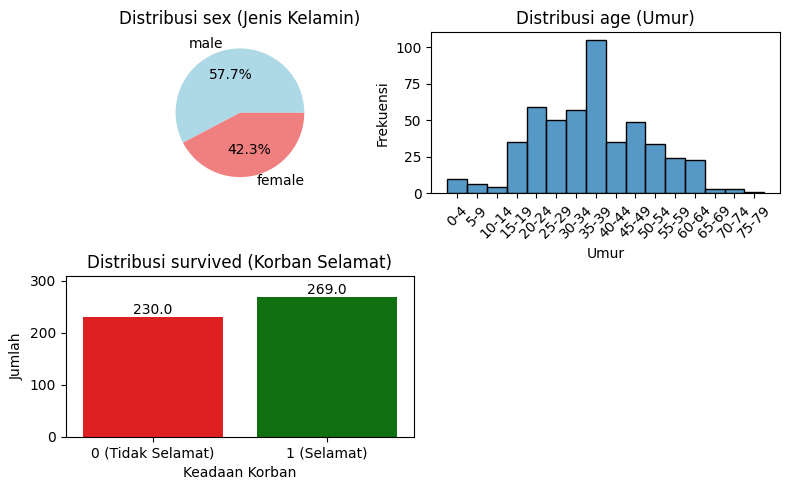

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat figure dan axes
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

# Pie chart untuk kolom 'sex'
sex_counts = df['sex'].value_counts()
axes[0, 0].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
axes[0, 0].set_title('Distribusi sex (Jenis Kelamin)')

# Histogram untuk kolom 'age'
sns.histplot(x='range_age', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribusi age (Umur)')
axes[0, 1].set_xlabel('Umur')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_ylabel('Frekuensi')

# # Grafik Batang untuk kolom 'survived'
color = ['red', 'green']
ax = sns.countplot(x='survived', hue='survived', data=df, ax=axes[1, 0], palette=color, legend=False, width=0.8)

axes[1, 0].set_title('Distribusi survived (Korban Selamat)')
axes[1, 0].set_xlabel('Keadaan Korban')
axes[1, 0].set_ylabel('Jumlah')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['0 (Tidak Selamat)', '1 (Selamat)'])

# Supaya tidak terpotong garis y
ymax = df['survived'].value_counts().max()
axes[1, 0].set_ylim(0, ymax * 1.15)  # tambahkan 15% ruang di atas batang tertinggi

# Menambahkan nilai di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')


# Remove the empty subplot
fig.delaxes(axes[1, 1])

# Menampilkan figure
plt.tight_layout()
plt.show()

Observation:

1. Grafik sex

Menunjukkan bahwa jumlah penumpang laki-laki lebih banyak daripada penumpang perempuan.

2. Grafik age

Menunjukkan bahwa penumpang yang dominan berada pada rentang usia 35 hingga 39 tahun, dengan jumlah mencapai sekitar 100 orang.

3. Grafik survived

Menunjukkan bahwa penumpang yang tidak selamat hampir mencapai setengah dari total keseluruhan.


In [187]:
# Melihat jumlah data range_age
df.loc[df['range_age'] == '35-39'].shape[0]

105

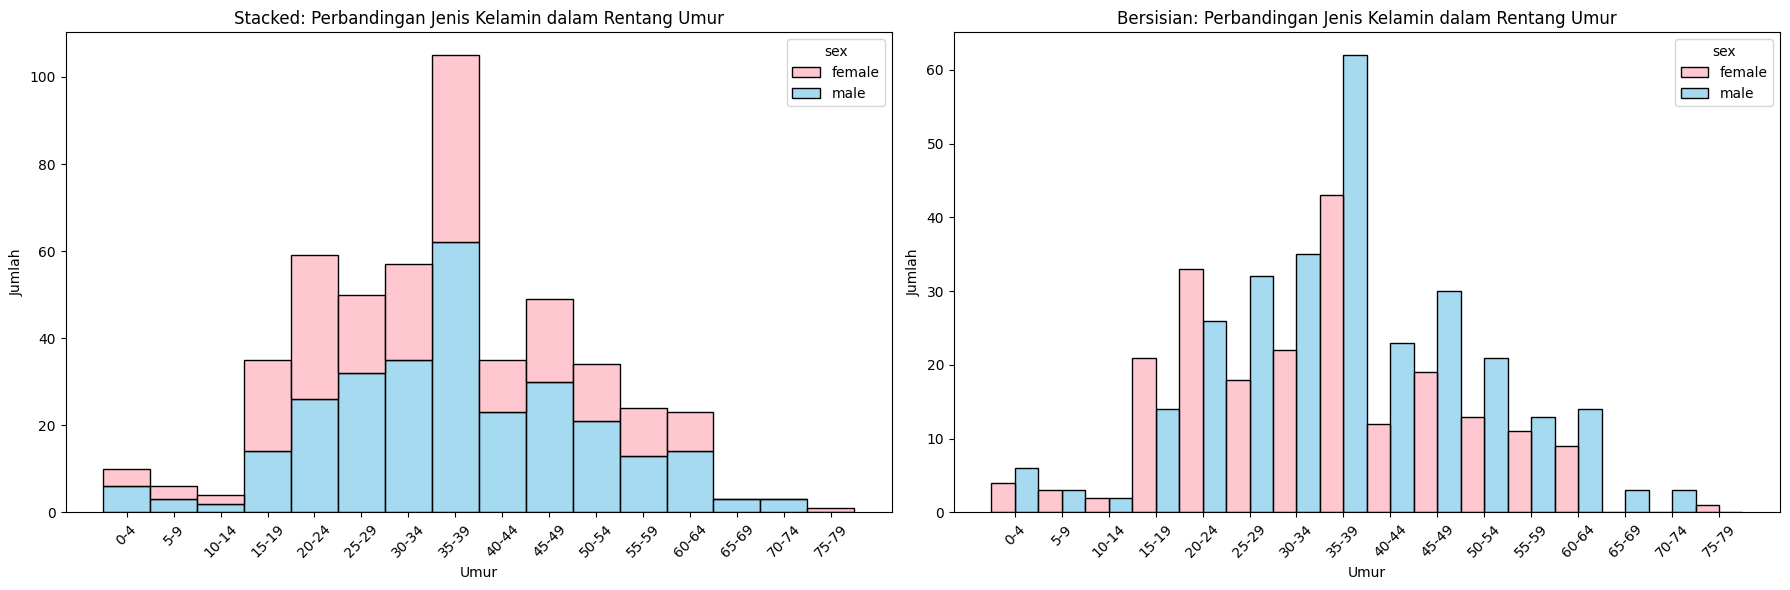

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#FFB6C1', '#87CEEB']  # Warna untuk masing-masing jenis kelamin

# Membuat figure dan axes untuk 2 grafik
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 baris, 2 kolom

# Grafik 1: Stacked Bar
sns.histplot(x='range_age', hue='sex', data=df, multiple='stack', palette=colors, ax=axes[0])
axes[0].set_title('Stacked: Perbandingan Jenis Kelamin dalam Rentang Umur')
axes[0].set_xlabel('Umur')
axes[0].set_ylabel('Jumlah')
axes[0].tick_params(axis='x', rotation=45)

# Grafik 2: Bersisian (Dodge)
sns.histplot(x='range_age', hue='sex', data=df, multiple='dodge', palette=colors, ax=axes[1])
axes[1].set_title('Bersisian: Perbandingan Jenis Kelamin dalam Rentang Umur')
axes[1].set_xlabel('Umur')
axes[1].set_ylabel('Jumlah')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


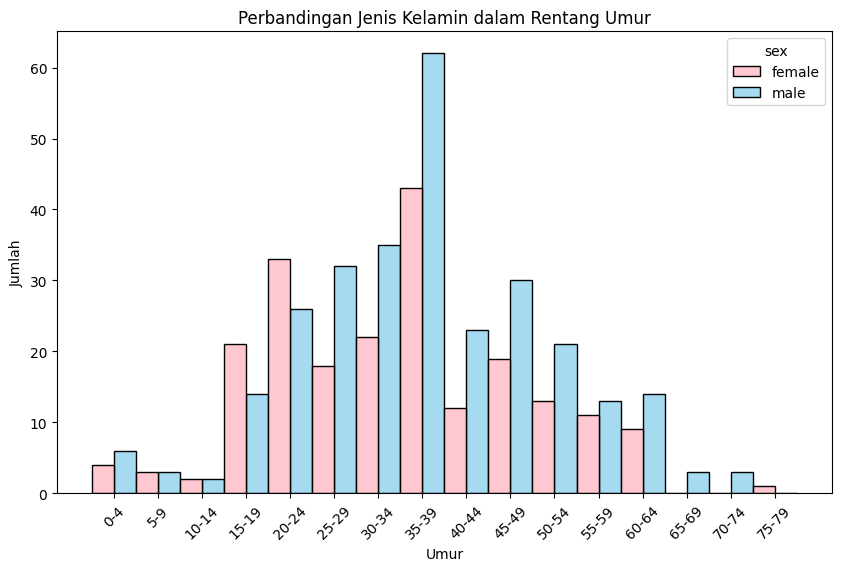

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat stacked bar chart
plt.figure(figsize=(10, 6))  # Mengatur ukuran figure
colors = ['#FFB6C1', '#87CEEB']

# Kalau bertumpuk pake "stack"
# Change the keys to 'male' and 'female'
ax = sns.histplot(x='range_age', hue='sex', data=df, multiple="dodge", palette=colors)
plt.title('Perbandingan Jenis Kelamin dalam Rentang Umur')
plt.xlabel('Umur')
plt.ylabel('Jumlah')

# Rotate x-axis labels
ax.tick_params(axis='x', rotation=45) # Rotate x-axis labels by 45 degrees

plt.show()

In [190]:
# Cek jumlah data
df[df['range_age'] == '55-59']

,survived,name,sex,age,range_age
33,1,"Bonnell, Miss. Elizabeth",female,58.0,55-59
42,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.0,55-59
50,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,55-59
79,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,55-59
139,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,55-59
154,0,"Hays, Mr. Charles Melville",male,55.0,55-59
158,0,"Hipkins, Mr. William Edward",male,55.0,55-59
174,0,"Kent, Mr. Edward Austin",male,58.0,55-59
186,1,"Lindstrom, Mrs. Carl Johan (Sigrid Posse)",female,55.0,55-59
192,1,"Lurette, Miss. Elise",female,58.0,55-59


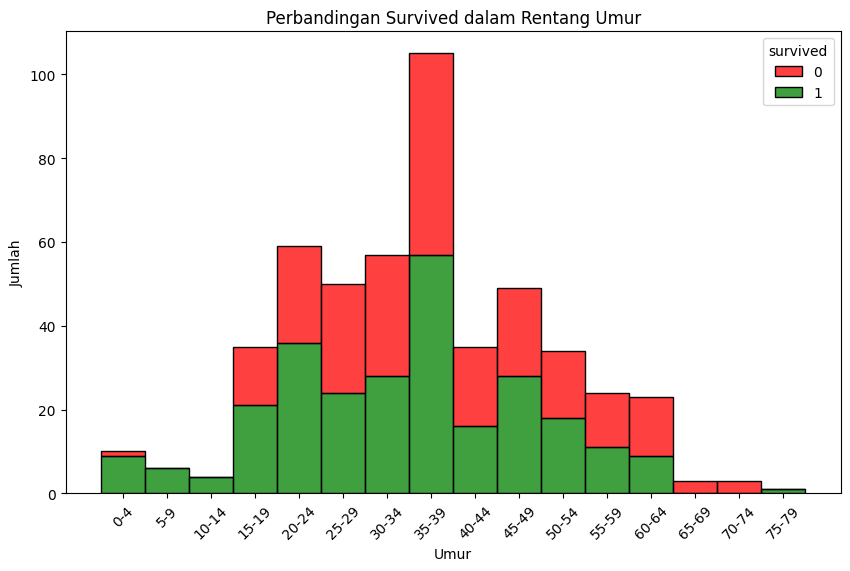

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat stacked bar chart
plt.figure(figsize=(10, 6))  # Mengatur ukuran figure
colors = ['red', 'green']

# Kalau bertumpuk pake "stack"
ax = sns.histplot(x='range_age', hue='survived', data=df, multiple="stack", palette=colors)
plt.title('Perbandingan Survived dalam Rentang Umur')
plt.xlabel('Umur')
plt.ylabel('Jumlah')

# Rotate x-axis labels
ax.tick_params(axis='x', rotation=45) # Rotate x-axis labels by 45 degrees

plt.show()

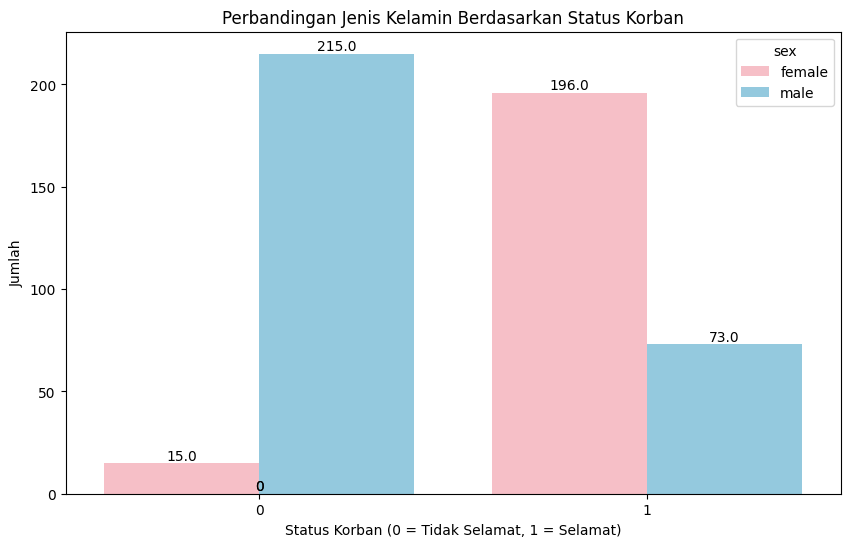

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat grafik batang vertikal
plt.figure(figsize=(10, 6))  # Mengatur ukuran figure
colors = ['#FFB6C1', '#87CEEB']  # Warna untuk masing-masing jenis kelamin

# Menggunakan countplot untuk kategori 'survived'
ax = sns.countplot(x='survived', hue='sex', data=df, palette=colors)

plt.title('Perbandingan Jenis Kelamin Berdasarkan Status Korban')  # Judul grafik
plt.xlabel('Status Korban (0 = Tidak Selamat, 1 = Selamat)')    # Label sumbu X
plt.ylabel('Jumlah')

# Menambahkan nilai di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


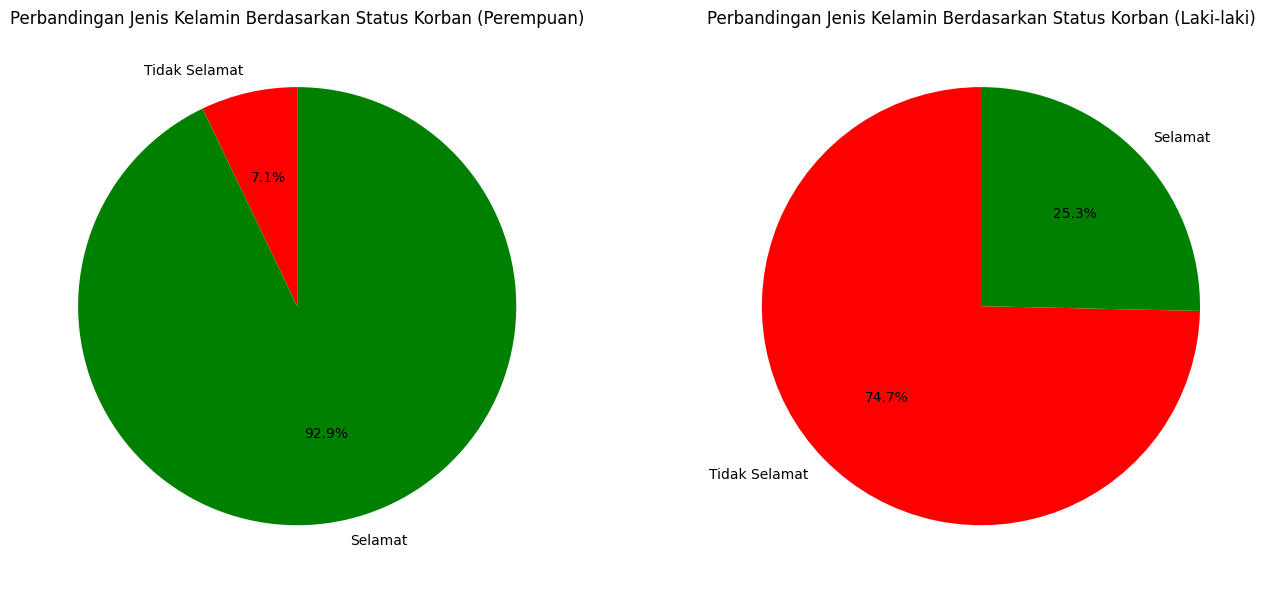

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah berdasarkan 'survived' dan 'sex'
survived_counts = df.groupby(['survived', 'sex']).size().unstack()

# Membuat figure untuk 2 pie chart
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 baris, 2 kolom

# Pie chart untuk perempuan
survived_counts['female'].plot.pie(ax=axes[0], autopct='%1.1f%%', colors=['red', 'green'],
                                   title='Perbandingan Jenis Kelamin Berdasarkan Status Korban (Perempuan)',
                                   startangle=90, labels=['Tidak Selamat', 'Selamat'])
axes[0].set_ylabel('')  # Menghapus label sumbu Y

# Pie chart untuk laki-laki
survived_counts['male'].plot.pie(ax=axes[1], autopct='%1.1f%%', colors=['red', 'green'],
                                 title='Perbandingan Jenis Kelamin Berdasarkan Status Korban (Laki-laki)',
                                 startangle=90, labels=['Tidak Selamat', 'Selamat'])
axes[1].set_ylabel('')  # Menghapus label sumbu Y

# Menampilkan grafik
plt.tight_layout()
plt.show()


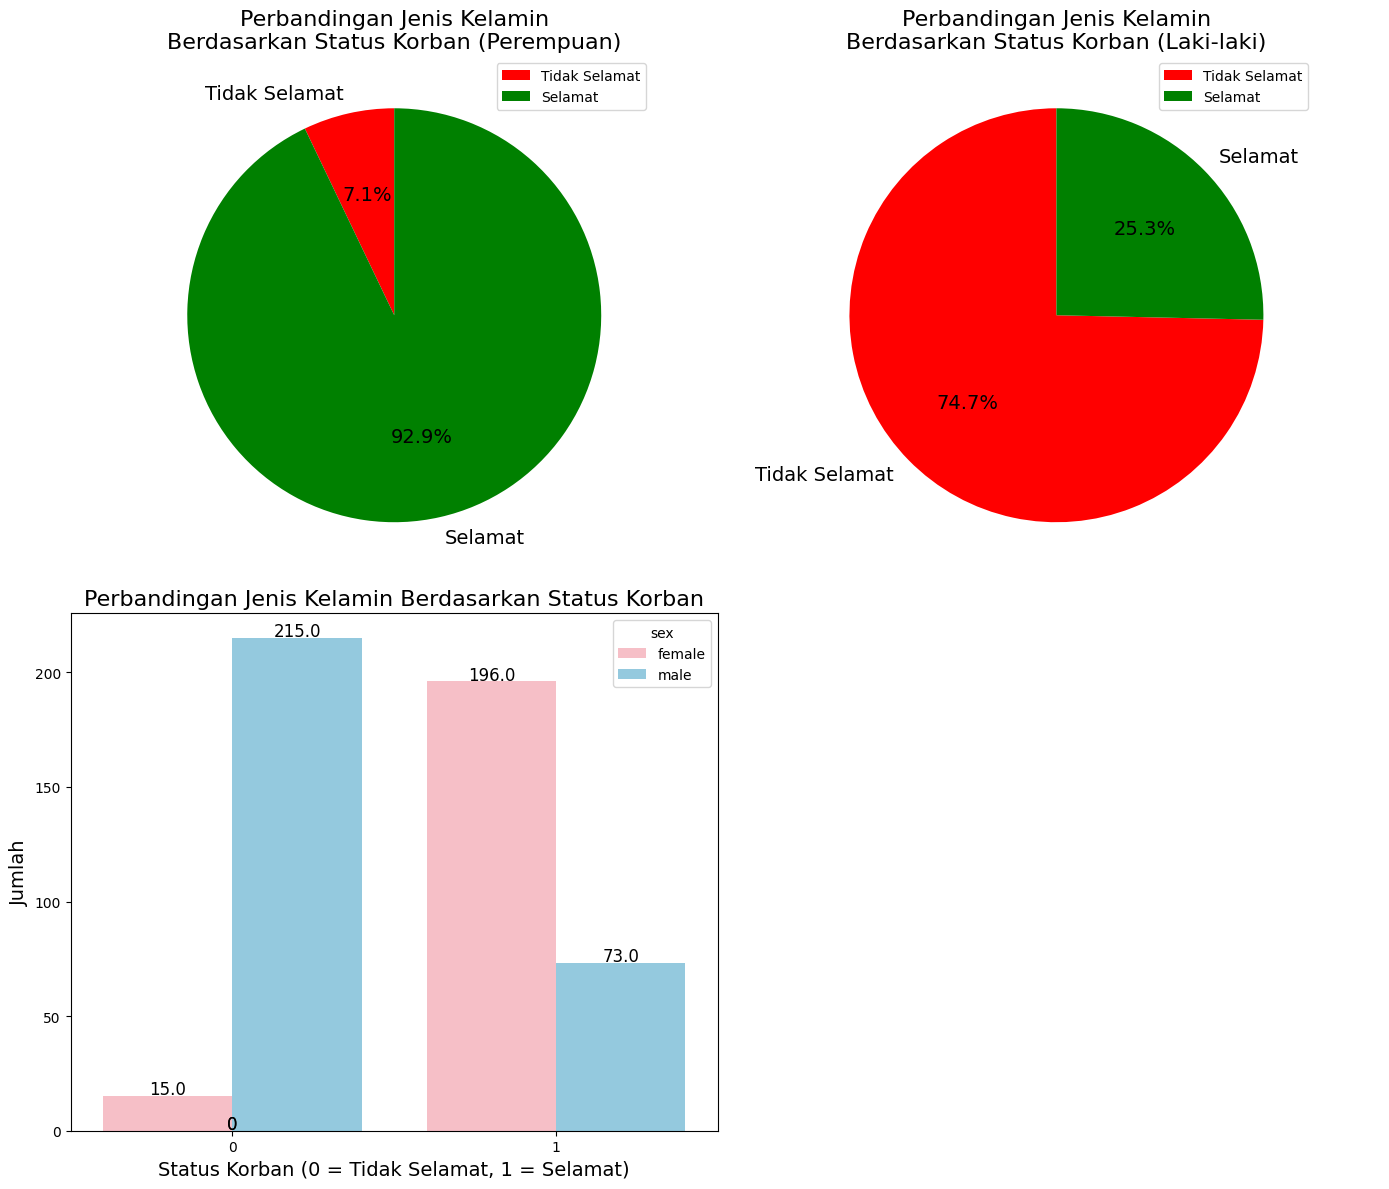

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah berdasarkan 'survived' dan 'sex'
survived_counts = df.groupby(['survived', 'sex']).size().unstack()

# Membuat figure untuk 2 baris dan 2 kolom (pie chart di atas, countplot yang diperluas di bawah)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # 2 baris, 2 kolom

# --- Pie chart untuk perempuan ---
survived_counts['female'].plot.pie(ax=axes[0, 0], autopct='%1.1f%%', colors=['red', 'green'],
                                   title='Perbandingan Jenis Kelamin\nBerdasarkan Status Korban (Perempuan)',
                                   startangle=90, labels=['Tidak Selamat', 'Selamat'], fontsize=14, legend=True)  # Menambahkan legenda
axes[0, 0].set_ylabel('')  # Menghapus label sumbu Y pada pie chart
axes[0, 0].set_title('Perbandingan Jenis Kelamin\nBerdasarkan Status Korban (Perempuan)', fontsize=16)  # Ukuran font judul

# --- Pie chart untuk laki-laki ---
survived_counts['male'].plot.pie(ax=axes[0, 1], autopct='%1.1f%%', colors=['red', 'green'],
                                 title='Perbandingan Jenis Kelamin\nBerdasarkan Status Korban (Laki-laki)',
                                 startangle=90, labels=['Tidak Selamat', 'Selamat'], fontsize=14, legend=True)  # Menambahkan legenda
axes[0, 1].set_ylabel('')  # Menghapus label sumbu Y pada pie chart
axes[0, 1].set_title('Perbandingan Jenis Kelamin\nBerdasarkan Status Korban (Laki-laki)', fontsize=16)  # Ukuran font judul

# --- Grafik Batang Vertikal: Perbandingan Jenis Kelamin Berdasarkan Status Korban ---
colors = ['#FFB6C1', '#87CEEB']
sns.countplot(x='survived', hue='sex', data=df, palette=colors, ax=axes[1, 0])

# Menggabungkan axes[1, 0] dan axes[1, 1] menjadi satu untuk countplot yang lebih besar
axes[1, 0].set_title('Perbandingan Jenis Kelamin Berdasarkan Status Korban', fontsize=16)  # Ukuran font judul
axes[1, 0].set_xlabel('Status Korban (0 = Tidak Selamat, 1 = Selamat)', fontsize=14)  # Ukuran font label X
axes[1, 0].set_ylabel('Jumlah', fontsize=14)  # Ukuran font label Y

# Menambahkan nilai di atas setiap batang
for p in axes[1, 0].patches:
    axes[1, 0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                        textcoords='offset points')

# Menghapus axes[1, 1] karena sudah digabungkan dengan axes[1, 0]
axes[1, 1].axis('off')  # Menghilangkan grafik pada posisi keempat

# Menampilkan grafik
plt.tight_layout()
plt.show()


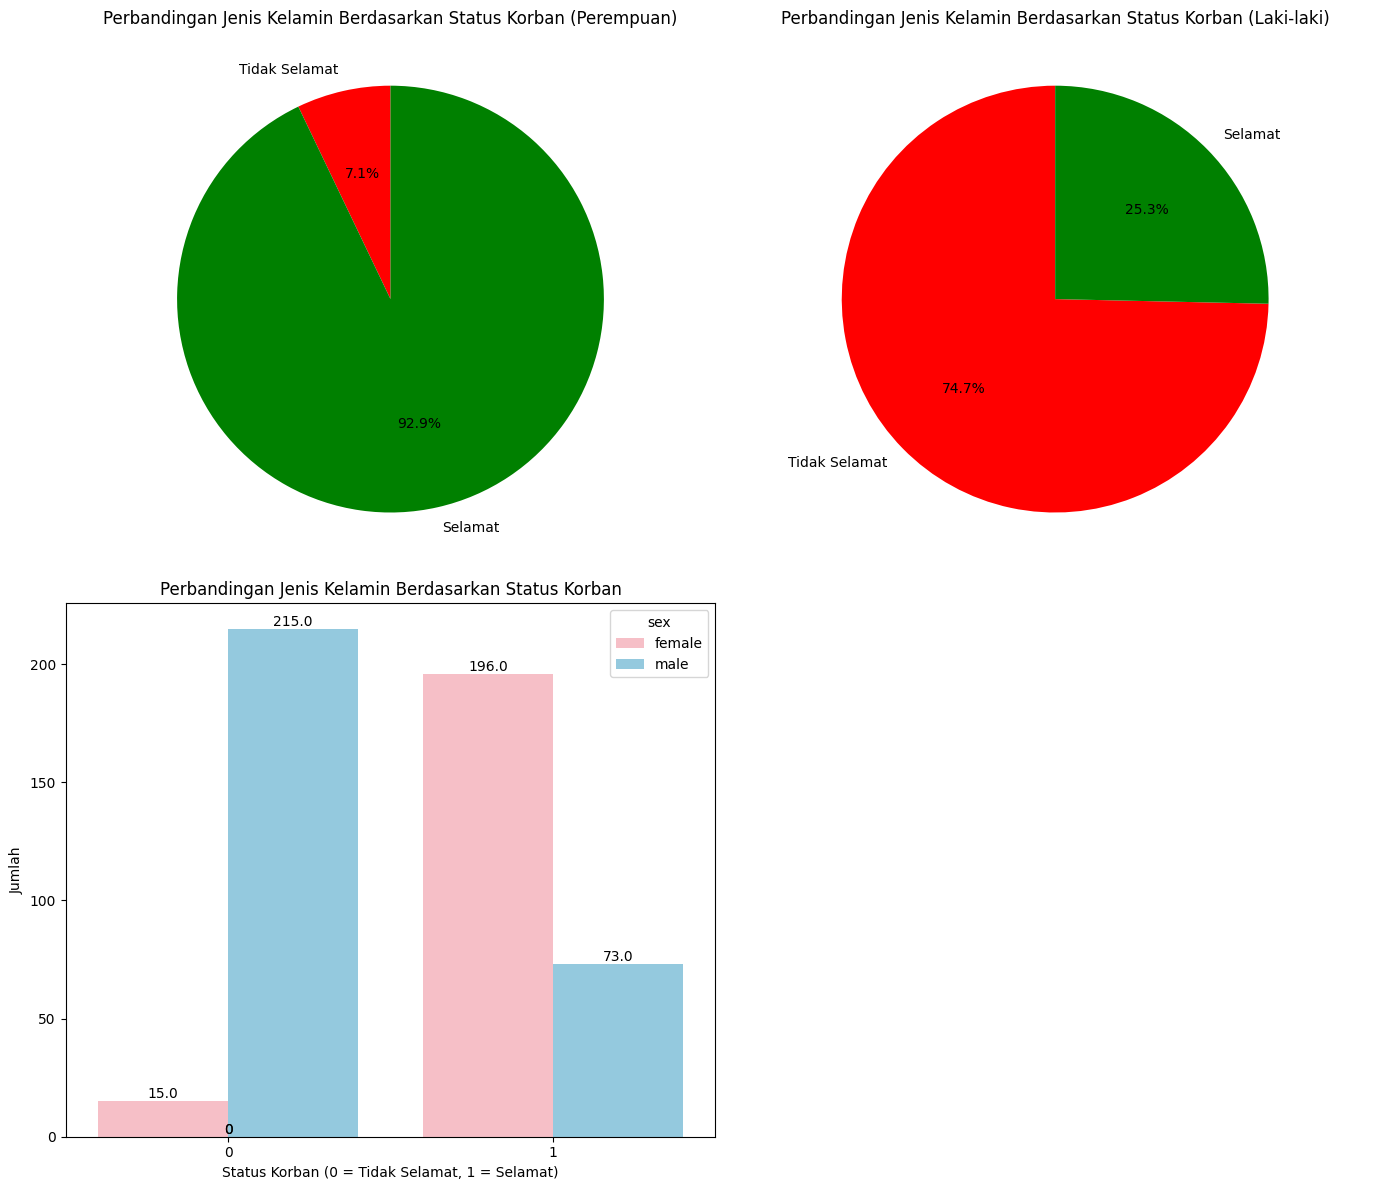

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah berdasarkan 'survived' dan 'sex'
survived_counts = df.groupby(['survived', 'sex']).size().unstack()

# Membuat figure untuk 2 baris dan 2 kolom (pie chart di atas, countplot yang diperluas di bawah)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # 2 baris, 2 kolom

# --- Pie chart untuk perempuan ---
survived_counts['female'].plot.pie(ax=axes[0, 0], autopct='%1.1f%%', colors=['red', 'green'],
                                   title='Perbandingan Jenis Kelamin Berdasarkan Status Korban (Perempuan)',
                                   startangle=90, labels=['Tidak Selamat', 'Selamat'])
axes[0, 0].set_ylabel('')  # Menghapus label sumbu Y pada pie chart

# --- Pie chart untuk laki-laki ---
survived_counts['male'].plot.pie(ax=axes[0, 1], autopct='%1.1f%%', colors=['red', 'green'],
                                 title='Perbandingan Jenis Kelamin Berdasarkan Status Korban (Laki-laki)',
                                 startangle=90, labels=['Tidak Selamat', 'Selamat'])
axes[0, 1].set_ylabel('')  # Menghapus label sumbu Y pada pie chart

# --- Grafik Batang Vertikal: Perbandingan Jenis Kelamin Berdasarkan Status Korban ---
colors = ['#FFB6C1', '#87CEEB']
sns.countplot(x='survived', hue='sex', data=df, palette=colors, ax=axes[1, 0])

# Menggabungkan axes[1, 0] dan axes[1, 1] menjadi satu untuk countplot yang lebih besar
axes[1, 0].set_title('Perbandingan Jenis Kelamin Berdasarkan Status Korban')  # Judul grafik
axes[1, 0].set_xlabel('Status Korban (0 = Tidak Selamat, 1 = Selamat)')    # Label sumbu X
axes[1, 0].set_ylabel('Jumlah')

# Menambahkan nilai di atas setiap batang
for p in axes[1, 0].patches:
    axes[1, 0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

# Menghapus axes[1, 1] karena sudah digabungkan dengan axes[1, 0]
axes[1, 1].axis('off')  # Menghilangkan grafik pada posisi keempat

# Menampilkan grafik
plt.tight_layout()
plt.show()
